In [915]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [977]:
import json

# Choose a Kinematic Solver Type

Import CSV file as DataFrame. Drop the incomplete first loop with index -1

In [916]:
joint_positions_speed = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_094832')
joint_positions_distance = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_090327')
joint_positions_manipulator1 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_080501')
joint_positions_manipulator2 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230120_160632')

l_of_jp = [joint_positions_speed, joint_positions_distance, joint_positions_manipulator1, joint_positions_manipulator2]

for jp in l_of_jp:
    jp.drop(jp.loc[jp['loop_count']==-1].index, inplace=True)

## IK solver type: Speed

In [917]:
s_mean = joint_positions_speed[joint_positions_speed.columns[3:]].mean()
s_std = joint_positions_speed[joint_positions_speed.columns[3:]].std()

## IK solver type: Distance

In [918]:
d_mean = joint_positions_distance[joint_positions_distance.columns[3:]].mean()
d_std = joint_positions_distance[joint_positions_distance.columns[3:]].std()

## IK solver type: Manipulator1

In [919]:
(joint_positions_manipulator1['loop_count'].min(), joint_positions_manipulator1['loop_count'].max())

(2, 165)

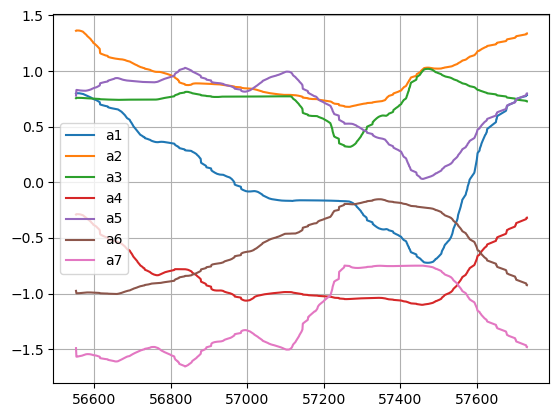

In [920]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator1.columns[3:]:
    ax.plot(joint_positions_manipulator1[joint].loc[joint_positions_manipulator1['loop_count']==35], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

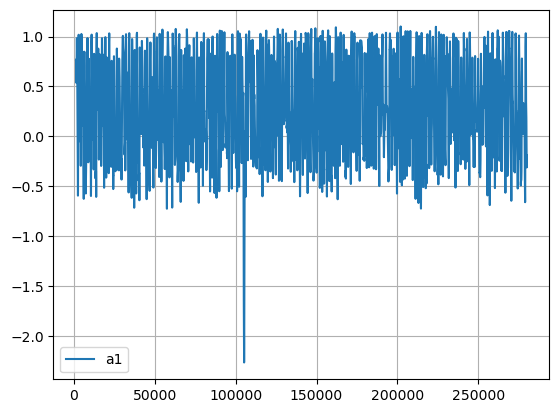

In [921]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator1['a1'], label='a1')
ax.legend()
ax.grid()

In [922]:
m1_mean = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].mean()
m1_std = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].std()

## IK solver type: Manipulator2

Range of the loops

In [923]:
(joint_positions_manipulator2['loop_count'].min(), joint_positions_manipulator2['loop_count'].max())

(61, 182)

Plot the joint angles

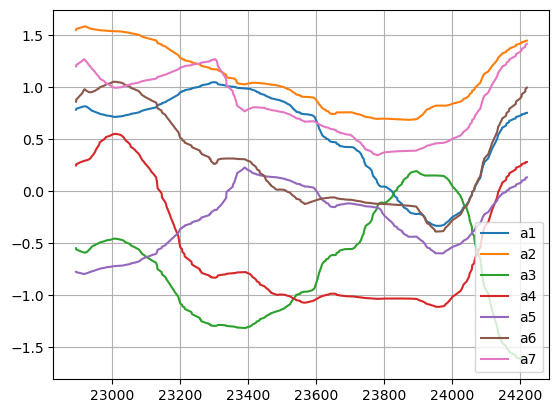

In [924]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator2.columns[3:]:
    ax.plot(joint_positions_manipulator2[joint].loc[joint_positions_manipulator2['loop_count']==75], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

absolute values of joint angles

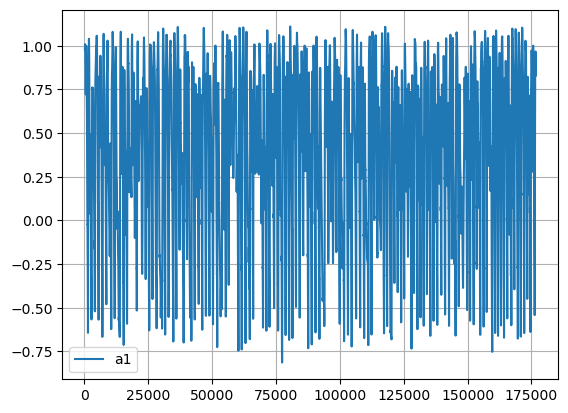

In [925]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator2['a1'], label='a1')
ax.legend()
ax.grid()

mean

In [926]:
m2_mean = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].mean()
m2_std = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].std()

## Results

In [927]:
r = {'speed_mean':s_mean, 'speed_std':s_std, 'distance_mean':d_mean, 'distance_std':d_std, 'manipulator1_mean':m1_mean, 'manipulator1_std':m1_std, 'manipulator2_mean':m2_mean, 'manipulator2_std':m2_std}
results = pd.concat(r, axis=1)
results

,speed_mean,speed_std,distance_mean,distance_std,manipulator1_mean,manipulator1_std,manipulator2_mean,manipulator2_std
a1,-0.336760,1.325953,0.061176,0.989919,0.301378,0.447856,0.395296,0.484671
a2,0.488490,1.050300,0.915152,0.760211,1.085121,0.278635,1.003355,0.224885
a3,0.203961,1.504412,0.453415,1.310912,-0.110943,0.671231,-0.189296,0.708768
a4,0.063836,0.843911,-0.248687,0.817918,-0.383849,0.693784,-0.685476,0.474235
a5,-0.080004,1.555742,-0.106131,1.298375,0.080124,0.605832,0.082773,0.594125
a6,0.041012,0.634103,0.051051,0.668554,0.051332,0.598569,-0.066305,0.498595
a7,-0.099540,1.431900,-0.165884,1.527451,0.039382,0.952229,0.081040,0.943457


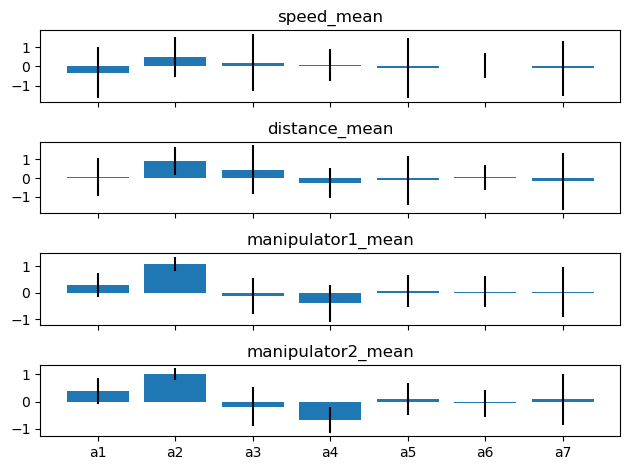

In [928]:
fix, axs = plt.subplots(4, sharex=True)
for plot, i in zip(range(4), range(0,7,2)):
    axs[plot].bar(range(7), results[results.columns[i]], yerr=results[results.columns[i+1]], tick_label=results.index )
    axs[plot].set_title(results.columns[i])

plt.tight_layout()

# Find the best route for a given Solver Type

## read csv data

In [929]:
joint_positions_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_105247')
joint_positions_manipulator1_long.drop(joint_positions_manipulator1_long.loc[joint_positions_manipulator1_long['loop_count']==-1].index, inplace=True)
joint_velocity_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_105247')
joint_velocity_manipulator1_long.drop(joint_velocity_manipulator1_long.loc[joint_velocity_manipulator1_long['loop_count']==-1].index, inplace=True)

In [930]:
joint_positions_manipulator2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_152415')
joint_positions_manipulator2_long.drop(joint_positions_manipulator2_long.loc[joint_positions_manipulator2_long['loop_count']==-1].index, inplace=True)
joint_velocity_manipulator2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_152415')
joint_velocity_manipulator2_long.drop(joint_velocity_manipulator2_long.loc[joint_velocity_manipulator2_long['loop_count']==-1].index, inplace=True)

In [931]:
jpm1_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230124_103805')
jpm1_10.drop(jpm1_10.loc[jpm1_10['loop_count']==-1].index, inplace=True)
jvm1_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230124_103805')
jvm1_10.drop(jvm1_10.loc[jvm1_10['loop_count']==-1].index, inplace=True)

In [932]:
jpm1_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230125_075156')
jpm1_5.drop(jpm1_5.loc[jpm1_5['loop_count']==-1].index, inplace=True)
jvm1_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230125_075156')
jvm1_5.drop(jvm1_5.loc[jvm1_5['loop_count']==-1].index, inplace=True)

## Additionals

In [933]:
def get_cycle_time(df, cycle_number):
    return (int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[0]))/1000000

def get_initial_joint_position(df, cycle_number):
    return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[0]

def get_final_joint_position(df, cycle_number):
    return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[-1]

## Ansatz 1: Minimierung der absoluten Achsgeschwindigkeit

* Schleife über jeden Zyklus
* Berechnung der Summe der absoluten Achsgeschwindigkeiten
* Mittelwert und Std für jeden Zyklus

In [934]:
def min_velo_mean_std(df1):
    l_of_mean = []
    l_of_std = []
    for cycle in range(df1['loop_count'].min(), df1['loop_count'].max()):
        mean = df1.loc[(df1['loop_count']==cycle, df1.columns[3:])].abs().sum(axis=1).mean()
        std = df1.loc[(df1['loop_count']==cycle, df1.columns[3:])].abs().sum(axis=1).std()
        l_of_mean.append((mean, cycle))
        l_of_std.append((std, cycle))

    
    '''plt.subplot(211)
    plt.bar([x[1] for x in l_of_mean], [y[0] for y in l_of_mean])
    plt.title('mean')
    plt.subplot(212)
    plt.bar([x[1] for x in l_of_std], [y[0] for y in l_of_std])
    plt.title('std')'''
    
    return (l_of_mean, l_of_std)

#min_velo_mean_std(joint_velocity_manipulator1_long)

## Ansatz 2: Minimierung der Zeit pro Zyklus

In [935]:
def min_time_cycle(df):
    l_of_ct = []
    for cycle in range(df['loop_count'].min(), df['loop_count'].max()):
        cycle_time = (int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[0]))/1000000
        l_of_ct.append((cycle_time, cycle))

    #plt.bar([x[1] for x in l_of_ct], [y[0] for y in l_of_ct])
    return l_of_ct

#min_time_cycle(joint_positions_manipulator1_long)

## Ansatz 3: Minimierung der absoluten Achsbewegung

In [936]:
def min_joint_movement(df):
    l_of_integrals = []
    for cycle in range(df['loop_count'].min(), df['loop_count'].max()):
        cycle_joints = df.loc[(df['loop_count']==cycle, df.columns[3:])].abs().cumsum(axis=0)
        cycle_cumulated = cycle_joints.cumsum(axis=1)['a7'] # the accumulated result is written in the last column
        integral = cycle_cumulated.sum()/len(cycle_cumulated)
        l_of_integrals.append((integral, cycle))

    #plt.bar([x[1] for x in l_of_integrals], [y[0] for y in l_of_integrals])

    return l_of_integrals

#min_joint_movement(joint_positions_manipulator1_long)

## Results #2

In [937]:
df = joint_positions_manipulator1_long
df_velo = joint_velocity_manipulator1_long

In [938]:
df = jpm1_10
df_velo = jvm1_10

In [939]:
df = jpm1_5
df_velo = jvm1_5

In [940]:
joint_positions = {}

### Joint Velocities

In [941]:
mvms = min_velo_mean_std(df_velo)

(0.9156976827445378, 66)
60.790228
(0.6908690304303234, 447)
63.885066


Text(0.5, 1.0, 'std: 0.69 #447')

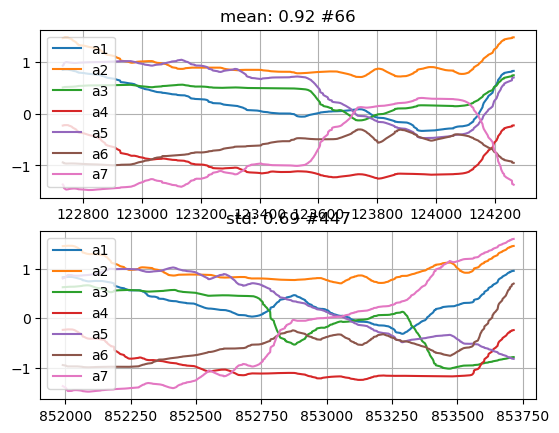

In [942]:
print(min(mvms[0], key=lambda t:t[0]))
print(get_cycle_time(df, min(mvms[0], key=lambda t:t[0])[1]))
print(min(mvms[1], key=lambda t:t[0]))
print(get_cycle_time(df, min(mvms[1], key=lambda t:t[0])[1]))
plt.subplot(211)
plt.plot(df.loc[(df['loop_count']==min(mvms[0], key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('mean: '+str(np.round(min(mvms[0], key=lambda t:t[0])[0],2))+' #'+str(min(mvms[0], key=lambda t:t[0])[1]))
plt.subplot(212)
plt.plot(df.loc[(df['loop_count']==min(mvms[1], key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('std: '+str(np.round(min(mvms[1], key=lambda t:t[0])[0],2))+' #'+str(min(mvms[1], key=lambda t:t[0])[1]))

In [995]:
joint_positions['mvms_mean_init'] = get_initial_joint_position(jpm1_10, min(mvms[0], key=lambda t:t[0])[1]).to_list()
joint_positions['mvms_mean_final'] = get_final_joint_position(jpm1_10, min(mvms[0], key=lambda t:t[0])[1]).to_list()
joint_positions['mvms_std_init'] = get_initial_joint_position(jpm1_10, min(mvms[1], key=lambda t:t[0])[1]).to_list()
joint_positions['mvm_std_final'] = get_final_joint_position(jpm1_10, min(mvms[1], key=lambda t:t[0])[1]).to_list()

### Cycle Time

In [944]:
mtc = min_time_cycle(df)

(20.875483, 584)
20.875483


Text(0.5, 1.0, 'cycle time: 20.88s #584')

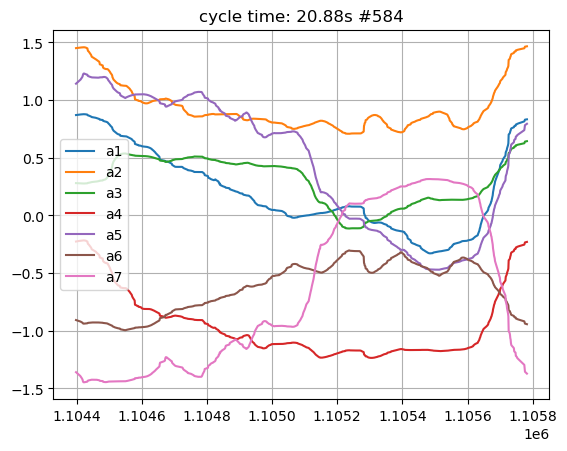

In [945]:
print(min(mtc, key=lambda t:t[0]))
print(get_cycle_time(df, min(mtc, key=lambda t:t[0])[1]))
plt.plot(df.loc[(df['loop_count']==min(mtc, key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('cycle time: '+str(np.round(min(mtc, key=lambda t:t[0])[0],2))+'s #'+str(min(mtc, key=lambda t:t[0])[1]))

In [994]:
joint_positions['mtc_init'] = get_initial_joint_position(jpm1_10, min(mtc, key=lambda t:t[0])[1]).to_list()
joint_positions['mtc_final'] = get_final_joint_position(jpm1_10, min(mtc, key=lambda t:t[0])[1]).to_list()

### Accumulated Joint Movement

In [947]:
mjm = min_joint_movement(df)

(3556.9188033974647, 584)
20.875483


Text(0.5, 1.0, 'minimum acc joint movement: 3556.92 #584')

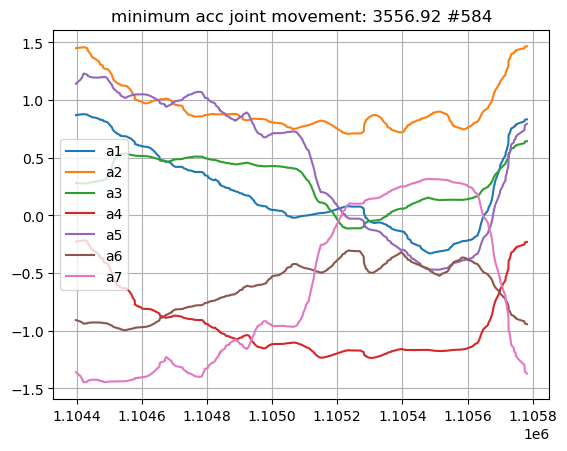

In [948]:
print(min(mjm, key=lambda t:t[0]))
print(get_cycle_time(df, min(mjm, key=lambda t:t[0])[1]))
plt.plot(df.loc[(df['loop_count']==min(mjm, key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('minimum acc joint movement: '+str(np.round(min(mjm, key=lambda t:t[0])[0],2))+' #'+str(min(mjm, key=lambda t:t[0])[1]))

In [992]:
joint_positions['mjm_init'] = get_initial_joint_position(jpm1_10, min(mjm, key=lambda t:t[0])[1]).to_list()
joint_positions['mjm_final'] = get_final_joint_position(jpm1_10, min(mjm, key=lambda t:t[0])[1]).to_list()

# ToDo

Ansatz Joint Velocity mean und std zu minimieren ergibt keine geringen Zykluszeiten. <br>
**toDo:**
* initial und final joint position vergleichen 
* joint positions von cycle time und acc joint movement exportieren
* 10 besten cycle time und acc joint movement vergleichen

In [996]:
joint_positions

{'mvms_mean_init': [0.987573504447937,
  1.487049221992493,
  -0.9348689913749696,
  -0.2370723634958267,
  -0.6613176465034485,
  0.7524455785751343,
  1.5524011850357056],
 'mvms_mean_final': [0.8335999846458435,
  1.4596376419067385,
  0.5964521169662476,
  -0.2385935187339782,
  0.8223150372505188,
  -0.9426670074462892,
  -1.355232834815979],
 'mvms_std_init': [0.8153705596923828,
  1.4840779304504397,
  0.8755820989608765,
  -0.2311988919973373,
  0.60056471824646,
  -0.9686753153800964,
  -1.4205541610717771],
 'mvm_std_final': [0.826878011226654,
  1.4648404121398926,
  0.670918345451355,
  -0.2372932285070419,
  0.7548856735229492,
  -0.9432329535484314,
  -1.3694227933883667],
 'mtc_init': [0.7996509075164795,
  1.6047887802124023,
  -1.0486235618591309,
  0.2155245393514633,
  -0.4574581980705261,
  0.9329679012298584,
  1.404802322387695],
 'mtv_final': [0.9359568357467652,
  1.4814441204071045,
  -1.4021281003952026,
  -0.3254280984401703,
  -0.1281685084104538,
  0.561291

In [997]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/jp_from_long_term_data.json', 'w') as file:
    json.dump(joint_positions, file, indent=4)
    file.close()

In [998]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/jp_from_long_term_data.json') as optimal_joint_positions:
    jp_wheel_house_left = json.load(optimal_joint_positions)
    optimal_joint_positions.close()

type(jp_wheel_house_left)

dict